# Lab 7 and 8

Sierra Wilde and Michael Higgins

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from scipy import stats

I am loading the data from the h5 files, using the library 'h5py':

In [4]:
#opening the data files
hfhiggs = h5py.File('higgs_100000_pt_1000_1200.h5', 'r')
hfqcd = h5py.File('qcd_100000_pt_1000_1200.h5', 'r')

In [5]:
#loading the data from the files into an array so that it can be used in the notebook
higgs_data = np.array(hfhiggs.get('higgs_100000_pt_1000_1200'))
qcd_data = np.array(hfqcd.get('qcd_100000_pt_1000_1200'))

In order to link the names of the parameters to each column, I am making a pandas dataframe. This way I can call on each column by its parameter name, which makes things easier to keep track of. The pandas dataframe also makes it easy to cut the data based on paramater values, which I will be doing later.

In [6]:
#creating a table of the Higgs data
higgs_table = pd.DataFrame(higgs_data)
higgs_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
higgs_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
5,1174.455935,0.071862,1.044672,126.188319,0.047449,0.000213,1.989337,0.001517,0.818887,0.185665,0.134878,0.226728,0.726462,0.178298
6,1032.004347,0.178242,-0.334243,132.226981,0.066992,0.000250,0.832268,0.001008,1.048504,0.247989,0.117503,0.236517,0.473825,0.232523
7,1135.787115,0.798256,0.312947,125.914138,0.050225,0.000290,2.289501,0.000402,0.804291,0.491277,0.363850,0.610820,0.740620,0.292758
8,1146.647636,0.250791,0.117854,125.004463,0.061323,0.000206,0.894442,0.000169,1.367819,0.269084,0.200305,0.196725,0.744397,0.203620
9,1024.532082,-0.598499,-2.463925,135.176269,0.067150,0.000308,1.017620,0.001156,1.244498,0.163260,0.130371,0.131186,0.798545,0.233071


In [7]:
#creating a table of the background data
qcd_table = pd.DataFrame(qcd_data)
qcd_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
qcd_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
5,1155.195224,0.003468,-1.625682,298.826804,0.106260,0.003030,2.525106,0.020123,0.717723,0.358535,0.176662,0.499545,0.492732,0.345423
6,1078.106437,-0.972935,2.837172,120.116849,0.047568,0.000325,3.018076,0.001083,1.135965,0.479567,0.354158,0.422167,0.738495,0.125461
7,1159.876486,0.034505,-0.678353,144.697768,0.035045,0.000309,7.180292,0.010588,1.024686,0.761728,0.586193,0.743378,0.769556,0.051010
8,1098.278050,-0.398343,-2.913500,99.670946,0.021586,0.000070,7.004059,0.002613,1.001237,0.624393,0.545976,0.623622,0.874410,0.042698
9,1011.238531,0.833684,2.923444,246.644020,0.135709,0.003229,1.291779,0.001733,1.162754,0.415601,0.292361,0.357428,0.703466,0.365706


## Problem 1

I am plotting a histogram of the mass distribution for the Higgs and QCD data. I have normalized the QCD data to 2000 and the Higgs data to 50 by using the weights parameter in plt.hist(). The simulated datasets are the same size, but in real life, there would be a much higher proportion of QCD background data. Normalizing the two datasets to their respective values gives the correct proportions of magnitude, but doesn't require losing any information like removing Higgs events would. I am also plotting a true Poisson pmf that has the same mean as the background to see if I can use this as a pmf to describe the background distribution.

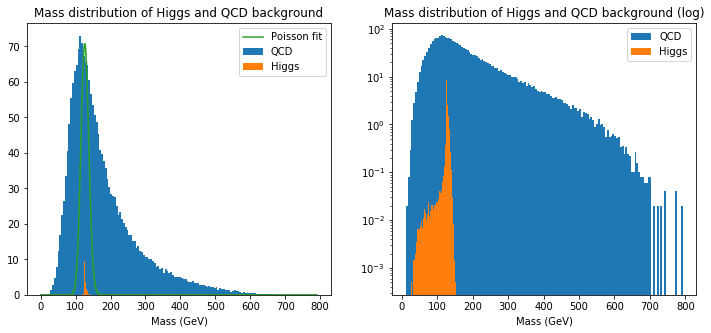

In [89]:
#plotting Higgs and QCD masses, and Poisson pmf
x = np.arange(0, qcd_table['mass'].max())
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(qcd_table['mass'], bins=150, label='QCD', weights=2000 * np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))
ax[0].hist(higgs_table['mass'], bins=150, label='Higgs', weights=50 * np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
ax[0].step(x, 2000 * stats.poisson.pmf(x, qcd_table['mass'].mean()-50), label='Poisson fit')
t= np.arange(0, 70)
#ax[0].step(t*10+70, 450*stats.poisson.pmf(t, 6))
ax[0].legend()
ax[0].set_title('Mass distribution of Higgs and QCD background')
ax[0].set_xlabel('Mass (GeV)')
ax[0].set_label('Number of occurrences')
ax[1].hist(qcd_table['mass'], bins=150, label='QCD', weights=2000 * np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))
ax[1].hist(higgs_table['mass'], bins=150, label='Higgs', weights=50 * np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
ax[1].set_title('Mass distribution of Higgs and QCD background (log)')
ax[1].set_xlabel('Mass (GeV)')
ax[1].set_label('Number of occurrences (log)')
ax[1].set_yscale('log')
ax[1].legend();

Distribution of the Higgs mass against the QCD background, both on normal and logarithmic scales. The Higgs data is normalized to 50, and the QCD to 2000.

Normalizing the data to 50 and 2000 for the higgs and qcd data respectively, using np.histogram instead of plt.hist(). This gives me the option to use the correctly weighted data without having to make a plot each time if needed.

In [10]:
higgs_hist = np.histogram(higgs_table['mass'], bins = 150, weights = 50 * np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
qcd_hist = np.histogram(qcd_table['mass'], bins=150, weights=2000 * np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))

I want to find the significance of the Higgs mass against the QCD mass distribution. In order to do this, I must first find what the Higgs mass was measure to be. This corresponds to the mode of the Higgs mass data, or the middle to the spike in the distribution. I am using Poisson statistics to find the significance. I am calculating the probability of measuring the Higgs mass based on the Poisson pmf, and then finding the $\sigma$ associated with that probability on a standard normal distribution.

In [11]:
#finding the mode of the Higgs data
higgs_peak = higgs_hist[1][np.where(higgs_hist[0] == higgs_hist[0].max())]
print(higgs_peak)

[124.73021713]


In [90]:
probability = stats.poisson.sf(higgs_peak, qcd_table['mass'].mean())
sigma = stats.norm.isf(probability)

print('The sigma value of the Higgs measurement is: {}'.format(sigma))

The sigma value of the Higgs measurement is: [-4.17639903]


Calculating $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$:

In [13]:
50/np.sqrt(2000)

1.118033988749895

$\frac{N_{Higgs}}{\sqrt{N_{QCD}}} = 1.12$

I will be using this relation to estimate the significance for the rest of the lab.

## Problem 2

For reference, I am plotting the mass histograms again. This time I am using the objects I made with np.histogram(), instead of plt.hist(), in order to ensure the same results from each.

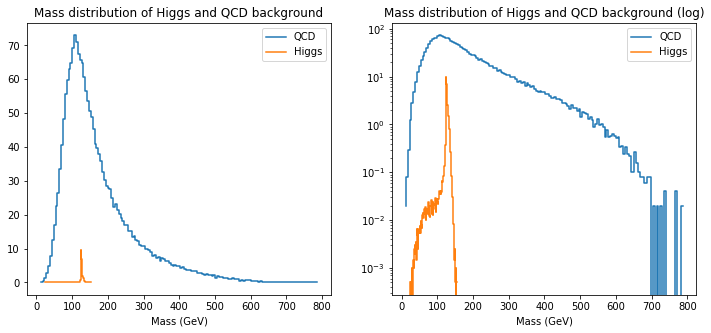

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].step(qcd_hist[1][:-1], qcd_hist[0], label='QCD')
ax[0].step(higgs_hist[1][:-1], higgs_hist[0], label='Higgs')
ax[0].set_title('Mass distribution of Higgs and QCD background')
ax[0].set_xlabel('Mass (GeV)')
ax[0].set_label('Number of occurrences')
ax[0].legend()
ax[1].step(qcd_hist[1][:-1], qcd_hist[0], label='QCD')
ax[1].step(higgs_hist[1][:-1], higgs_hist[0], label='Higgs')
ax[1].set_yscale('log')
ax[1].set_title('Mass distribution of Higgs and QCD background (log)')
ax[1].set_xlabel('Mass (GeV)')
ax[1].set_label('Number of occurrences (log)')
ax[1].legend();

Distibution of the Higgs and QCD masses normalized to 50 and 2000 respectively, again.

I am going to make cuts at 100 and the maximum Higgs value, because that is where most of the Higgs is. I want to keep as much of the Higgs data as possible. I am first going to leave most of the peak and see how the significance is affected. If the significance is still low, I will make more cuts around the true Higgs mass, which is 125 GeV.

In [15]:
print(higgs_table['mass'].max())

154.6136749993263


I am using a mask to select events from the pandas dataframes where the mass was in between the range of 100 GeV and 154.61... GeV. The selected data now has a different normalized value. The data has to be kept in the same proportions in order for the cutting to make sense. This means that if 50% of the background data was cut, that the new normalization value must be 50% of what it was originally, which is 2000. This will change the N values, and therefore change the significance of the Higgs data.

In [16]:
#creating masks where both datasets have masses between 100 and the Higgs max
higgscut1_mask = (higgs_table['mass'] > 100) & (higgs_table['mass'] < higgs_table['mass'].max())
qcdcut1_mask = (qcd_table['mass'] > 100) & (qcd_table['mass'] < higgs_table['mass'].max())

In [17]:
#applying the masks to the mass datasets themselves
higgs_1cut = higgs_table['mass'][higgscut1_mask]
qcd_1cut = qcd_table['mass'][qcdcut1_mask]

In [18]:
#finding the amount of data kept in each set, in order to normalize the cut data to the same distribution of area
higgs_weight1 = 50*len(higgs_1cut)/len(higgs_table['mass'])
qcd_weight1 = 2000*len(qcd_1cut)/len(qcd_table['mass'])
print(higgs_weight1)
print(qcd_weight1)

49.028
672.98


Here the new $N_{Higgs}$ is about 49 and the new $N_QCD$ is about 673. The QCD data was reduced much more than the Higgs data, which is what I want. This makes $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$, and thus the significance greater.

Calculating $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$ for the new amounts of data:

I am rounding up for the number of QCD and rounding down for the number of Higgs, because this makes the significance estimate on the lower side. It is better to have a slightly lower significance than a slightly higher significance, because that will more likely ensure discovery when a 5$\sigma$ signal is reached.

In [19]:
cut1_sig = 49/np.sqrt(673)
print('The new significance of the Higgs data after the first cut: {}'.format(cut1_sig))

The new significance of the Higgs data after the first cut: 1.8888111940046644


This significance is only marginally better than doing no cuts at all. I am going to try to cut more of the values, until I can get as close to a 5$\sigma$ significance as possible, while maximizing the amount of Higgs data I keep, using the same procedure as for the first cut.

In [20]:
higgscut2_mask = (higgs_table['mass'] > 110) & (higgs_table['mass'] < 140)
qcdcut2_mask = (qcd_table['mass'] > 110) & (qcd_table['mass'] < 140)

In [21]:
higgs_2cut = higgs_table['mass'][higgscut2_mask]
qcd_2cut = qcd_table['mass'][qcdcut2_mask]

In [22]:
higgs_weight2 = 50*len(higgs_2cut)/len(higgs_table['mass'])
qcd_weight2 = 2000*len(qcd_2cut)/len(qcd_table['mass'])
print(higgs_weight2)
print(qcd_weight2)

48.327
390.26


In [23]:
cut2_sig = 48/np.sqrt(391)
print('The new significance of the Higgs data after the second cut: {}'.format(cut2_sig))

The new significance of the Higgs data after the second cut: 2.427464339636033


In [24]:
higgscut3_mask = (higgs_table['mass'] > 115) & (higgs_table['mass'] < 135)
qcdcut3_mask = (qcd_table['mass'] > 115) & (qcd_table['mass'] < 135)

In [25]:
higgs_3cut = higgs_table['mass'][higgscut3_mask]
qcd_3cut = qcd_table['mass'][qcdcut3_mask]

In [26]:
higgs_weight3 = 50*len(higgs_3cut)/len(higgs_table['mass'])
qcd_weight3 = 2000*len(qcd_3cut)/len(qcd_table['mass'])
print(higgs_weight3)
print(qcd_weight3)

46.2655
261.58


In [27]:
cut3_sig = 46/np.sqrt(262)
print('The new significance of the Higgs data after the third cut: {}'.format(cut3_sig))

The new significance of the Higgs data after the third cut: 2.841889490789991


In [28]:
higgscut4_mask = (higgs_table['mass'] > 120) & (higgs_table['mass'] < 130)
qcdcut4_mask = (qcd_table['mass'] > 120) & (qcd_table['mass'] < 130)

In [29]:
higgs_4cut = higgs_table['mass'][higgscut4_mask]
qcd_4cut = qcd_table['mass'][qcdcut4_mask]

In [30]:
higgs_weight4 = 50*len(higgs_4cut)/len(higgs_table['mass'])
qcd_weight4 = 2000*len(qcd_4cut)/len(qcd_table['mass'])
print(higgs_weight4)
print(qcd_weight4)

37.9145
128.28


In [48]:
cut4_sig = 37/np.sqrt(129)
print('The new significance of the Higgs data after the fourth cut: {}'.format(cut4_sig))

The new significance of the Higgs data after the fourth cut: 3.2576683534048083


After cutting the data until it contains mass of only $\pm$5 GeV away from the true Higgs boson mass, 125 GeV, the significance has only gone up to 3.26$\sigma$. I am going to plot histograms of each of the cuts to see how much of the peak was lost. I don't want to cut anymore of the data just yet, because I don't want to cut too much of the peak. There still needs to be enough Higgs data so that there are enough stats for a signal to be determined.

In [32]:
#making dictionaries of each of the weights and cuts to make plotting a bit more efficient
higgs_mass_cuts = {'Cut 1':higgs_1cut, 'Cut 2':higgs_2cut, 'Cut 3':higgs_3cut, 'Cut 4':higgs_4cut}
qcd_mass_cuts = {'Cut 1':qcd_1cut, 'Cut 2':qcd_2cut, 'Cut 3':qcd_3cut, 'Cut 4':qcd_4cut}
higgs_weights = {'Cut 1':higgs_weight1, 'Cut 2':higgs_weight2, 'Cut 3':higgs_weight3, 'Cut 4':higgs_weight4}
qcd_weights = {'Cut 1':qcd_weight1, 'Cut 2':qcd_weight2, 'Cut 3':qcd_weight3, 'Cut 4':qcd_weight4}

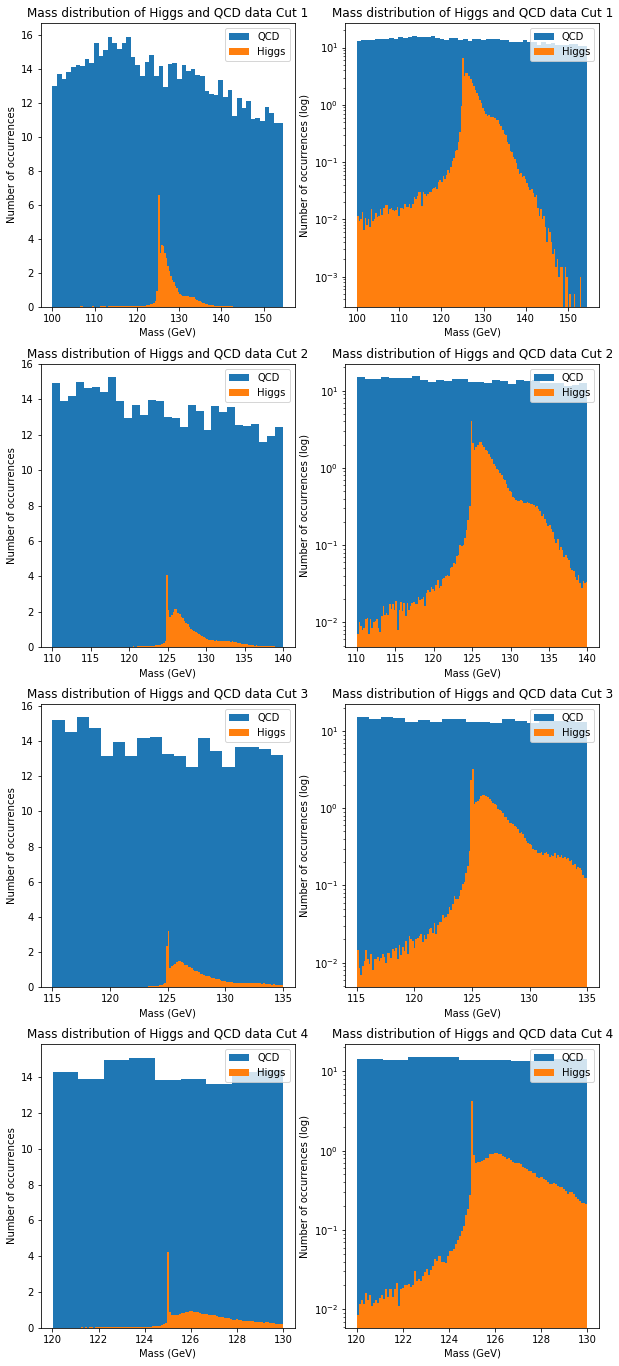

In [33]:
#looping through the dictionaries to plot the new distributions of mass normalized to their respective values
number = len(higgs_mass_cuts)
fig, axes = plt.subplots(number, 2, figsize = (10, 6*number))
for h, q, hw, qw, ax in zip(higgs_mass_cuts.items(), qcd_mass_cuts.items(), higgs_weights.items(), qcd_weights.items(), axes):
    ax[0].set_title('Mass distribution of Higgs and QCD data {}'.format(h[0]))
    ax[0].hist(q[1], label='QCD', bins=int(150*len(q[1])/100000), weights=qw[1]* np.ones(len(q[1])) / len(q[1]))
    ax[0].hist(h[1], label='Higgs', bins=int(150*len(h[1])/100000), weights=hw[1]* np.ones(len(h[1])) / len(h[1]))
    ax[0].set_xlabel('Mass (GeV)')
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('Mass distribution of Higgs and QCD data {}'.format(h[0]))
    ax[1].hist(q[1], label='QCD', bins=int(150*len(q[1])/100000), weights=qw[1]* np.ones(len(q[1])) / len(q[1]))
    ax[1].hist(h[1], label='Higgs', bins=int(150*len(h[1])/100000), weights=hw[1]* np.ones(len(h[1])) / len(h[1]))
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Mass (GeV)')
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distribution of the Higgs mass in comparison to the background after multiple cuts. Each noramlized to their appropriate value determined on the proportion of data from each set remaining.

The more mass cuts, the greater the significance will be. However after a certain number of cuts, there will be so little Higgs data, that it does not make sense to do any further analysis, because the stats are so low. There still needs to be enough Higgs data in order to justify a discovery. I think it will be more helpful to eliminate data based on other parameters, other than mass.

## Problem 3

Here are the plots of all the rest of the data before any cuts are made. I am looping through each column of the pandas dataframes and using plt.hist() noramlized to the appropriate weights.

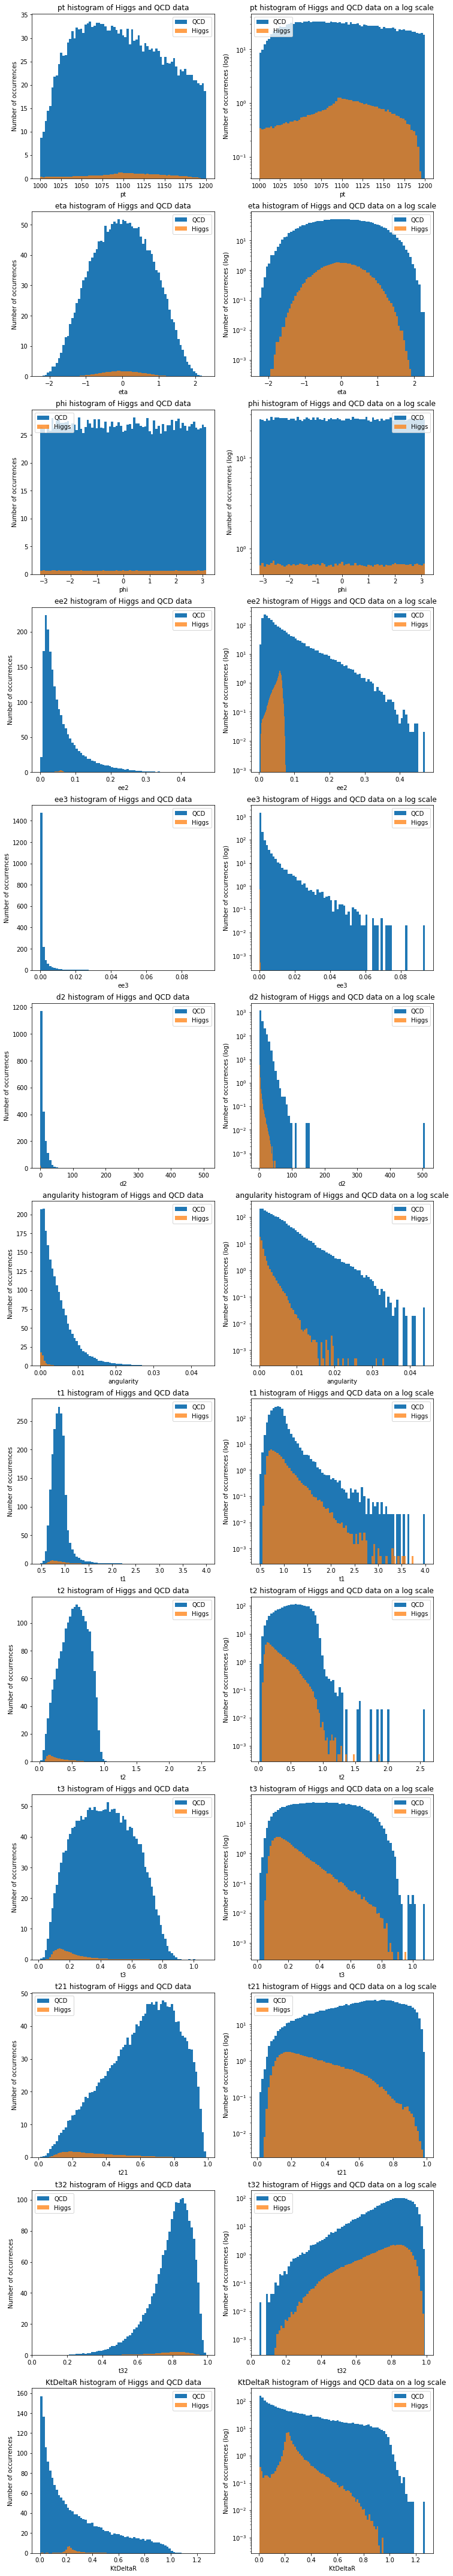

In [34]:
#creating histograms of the rest of the columns in the data
fig, axes = plt.subplots(13, 2, figsize=(12, 6*13))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns[:3].append(higgs_table.columns[4:])):
    ax[0].set_title('{} histogram of Higgs and QCD data'.format(column))
    ax[0].hist(qcd_table[column], bins=75, label='QCD', weights=2000*np.ones(len(qcd_table[column])) / len(qcd_table[column]))
    ax[0].hist(higgs_table[column], bins=75, label='Higgs', weights=50*np.ones(len(higgs_table[column])) / len(higgs_table[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data on a log scale'.format(column))
    ax[1].hist(qcd_table[column], bins=75, label='QCD', weights=2000*np.ones(len(qcd_table[column])) / len(qcd_table[column]))
    ax[1].hist(higgs_table[column], bins=75, label='Higgs', weights=50*np.ones(len(higgs_table[column])) / len(higgs_table[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distributions of the rest of the parameters in the LHC simulation.

Before any mass cuts, it looks like making cuts in $e_2$ and $e_3$ would give the best significance. A good amount of the QCD data could be eliminated without removing any Higgs data. This will minimize $N_{QCD}$ without affecting $N_{Higs}$, which will maximize the ratio $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$.

In problem 2 I only made cuts of the masses. Now I am going to make cuts to the entire dataset. That is to say, I am going to make cuts across all fourteen dimensions in order to completely eliminate events. I can see how the distributions of the other parameters are affected by these cuts. I am just going to use the last cut, so I am only included data that had a measured mass between 120 and 130 GeV.

In [35]:
higgs_table_cut = higgs_table[higgscut4_mask]
qcd_table_cut = qcd_table[qcdcut4_mask]

Plots of the all the parameters, besides mass, of the LHC data after the mass cut was made. This is to see how the distributions change. Each parameter might not be completely independent, and so each cut might change the shape of each distribution, not just the overall number of events.

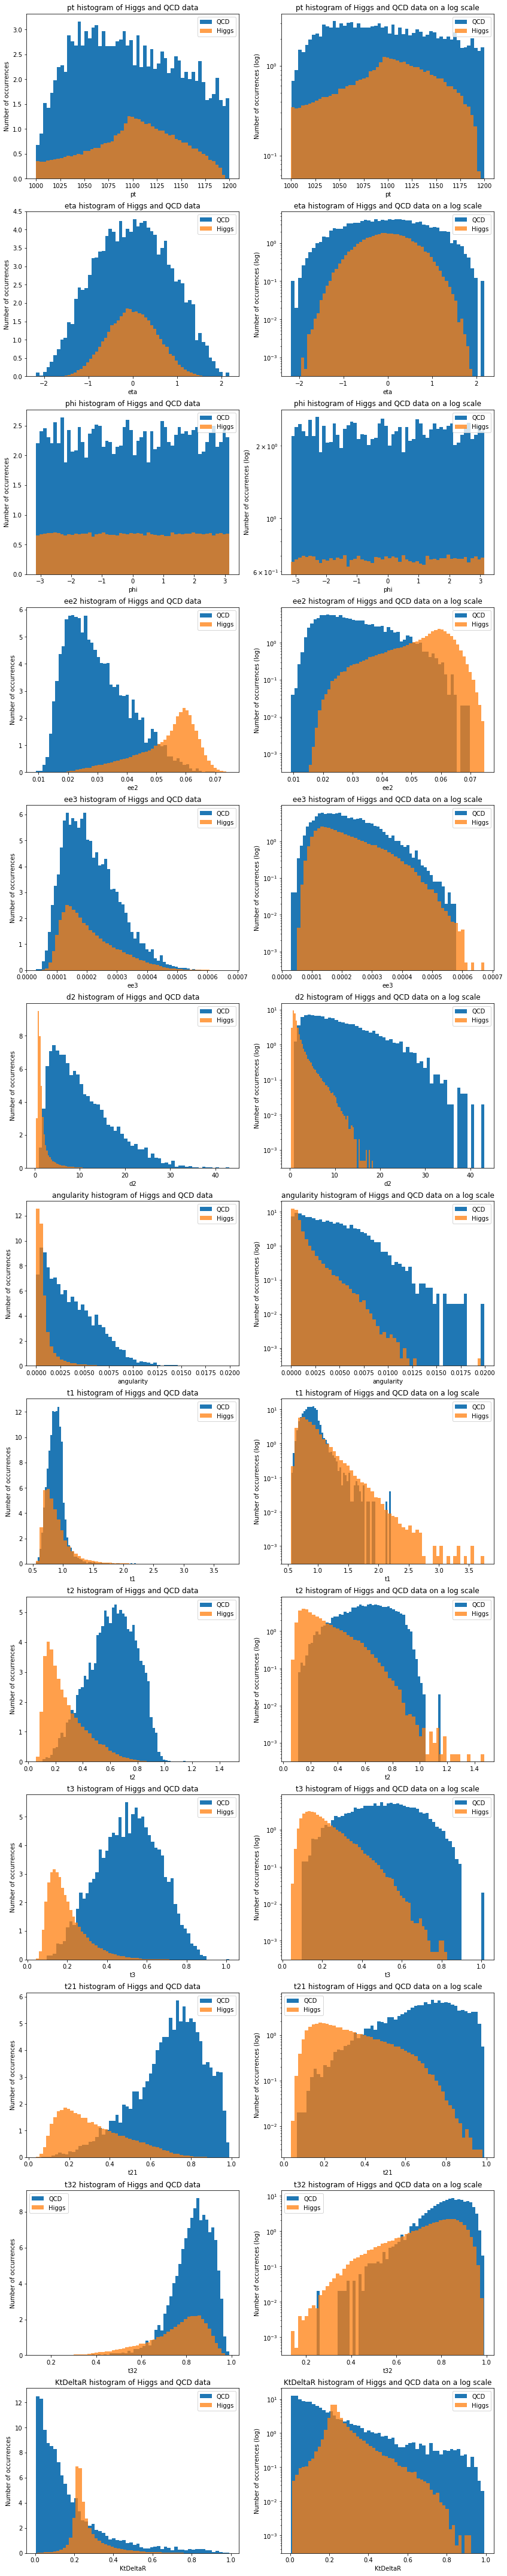

In [50]:
#creating histograms of the rest of the columns in the data with mass cuts
fig, axes = plt.subplots(13, 2, figsize=(14, 6*13))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns[:3].append(higgs_table.columns[4:])):
    ax[0].set_title('{} histogram of Higgs and QCD data'.format(column))
    ax[0].hist(qcd_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='QCD', weights=qcd_weight4*np.ones(len(qcd_table_cut[column])) / len(qcd_table_cut[column]))
    ax[0].hist(higgs_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='Higgs', weights=higgs_weight4*np.ones(len(higgs_table_cut[column])) / len(higgs_table_cut[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data on a log scale'.format(column))
    ax[1].hist(qcd_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='QCD', weights=qcd_weight4*np.ones(len(qcd_table_cut[column])) / len(qcd_table_cut[column]))
    ax[1].hist(higgs_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='Higgs', weights=higgs_weight4*np.ones(len(higgs_table_cut[column])) / len(higgs_table_cut[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distributions of the Higgs and QCD data parameters after the mass cuts.

From looking at the new distibutions, it looks like I can make significant cuts on the $D_2$ and angularity data and eliminate little, if any of the Higgs data. This will maximize significance, because $N_{QCD}$ is decreasing, but $N_{Higgs}$ will remain about the same. Making cuts in $\eta$ or $K_t\Delta R$ may be useful as well.

## Problem 4

I am first going to cut the $D_2$ data. I will start by removing the QCD data that is above all of the Higgs data, and see how that improves the significance. Then I will check the rest of the parameters to see if there are other cuts I can make without eliminating any more Higgs data. I will be using the data left from the mass cuts, because that has a different distribution than the original data.

In [41]:
#cutting out all of the QCD data that has a D2 greater than the greatest D2 of the Higgs
higgscutD_mask = (higgs_table_cut['d2'] <= higgs_table_cut['d2'].max())
qcdcutD_mask = (qcd_table_cut['d2'] <= higgs_table_cut['d2'].max())

In [42]:
#applying the cuts to the entire dataset that has the mass cuts
higgs_Dcut = higgs_table_cut[higgscutD_mask]
qcd_Dcut = qcd_table_cut[qcdcutD_mask]

In [43]:
#finding N for each, (N_Higgs should remain the same in this case)
higgs_weightD = 50*len(higgs_Dcut)/len(higgs_table)
qcd_weightD = 2000*len(qcd_Dcut)/len(qcd_table)
print(higgs_weightD)
print(qcd_weightD)

37.9145
110.06


In [47]:
cutD_sig = 37/np.sqrt(111)
print('The new significance of the Higgs data after the D_2 cut: {}'.format(cutD_sig))

The new significance of the Higgs data after the D_2 cut: 3.5118845842842465


This cut does not give a 5$\sigma$ significance. More cuts are needed. Before this, I am plotting the other factors to see how the most recent cut affected the other parameters. If the angularity distribution wasn't affected, I can make cuts on that, again without eliminating any more Higgs data. Or there might be another parameter that has a difference in the Higgs and QCD distributions.

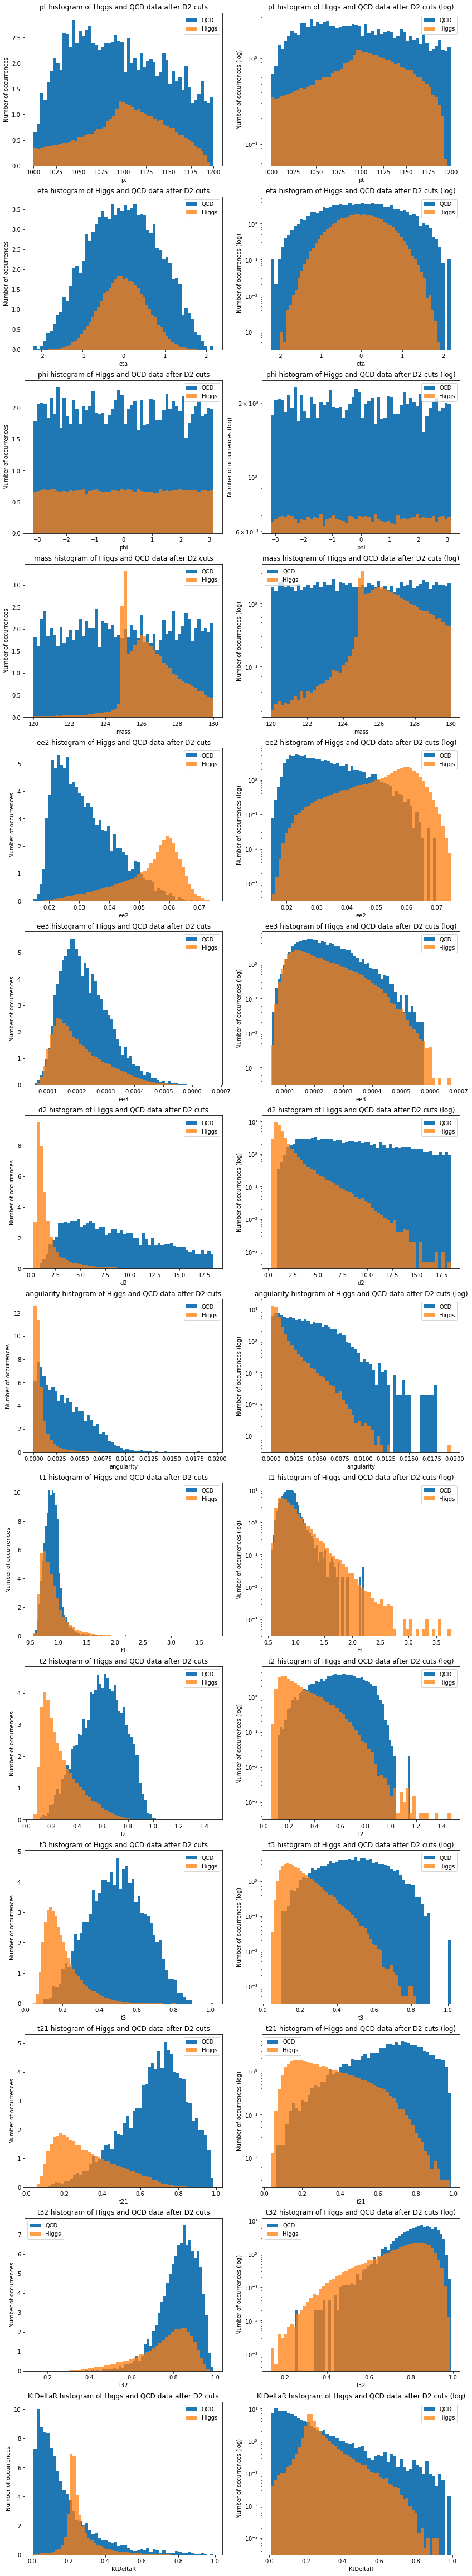

In [79]:
#plotting the data after the D_2 cuts
fig, axes = plt.subplots(14, 2, figsize=(14, 6*14))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns):
    ax[0].set_title('{} histogram of Higgs and QCD data after D2 cuts'.format(column))
    ax[0].hist(qcd_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='QCD', weights=qcd_weightD*np.ones(len(qcd_Dcut[column])) / len(qcd_Dcut[column]))
    ax[0].hist(higgs_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='Higgs', weights=higgs_weightD*np.ones(len(higgs_Dcut[column])) / len(higgs_Dcut[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data after D2 cuts (log)'.format(column))
    ax[1].hist(qcd_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='QCD', weights=qcd_weightD*np.ones(len(qcd_Dcut[column])) / len(qcd_Dcut[column]))
    ax[1].hist(higgs_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='Higgs', weights=higgs_weightD*np.ones(len(higgs_Dcut[column])) / len(higgs_Dcut[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distributions of all of the parameters in the LHC data after the mass and $D_2$ eliminations.

When looking at the new plots, making cuts on $t_3$ will probably eliminate the most QCD data. I will be cutting the data based on $t_3$ values to see how the significance increases. Then I will look at these plots again to see where else I can make cuts.

In [52]:
#cutting out all of the QCD data that has a t_3 value less than the Higgs maximum t_3
higgscutT3_mask = (higgs_Dcut['t3'] <= higgs_Dcut['t3'].max())
qcdcutT3_mask = (qcd_Dcut['t3'] <= higgs_Dcut['t3'].max())

In [54]:
#applying the cuts to the entire dataset that has the mass cuts and D_2 cuts
higgs_T3cut = higgs_Dcut[higgscutT3_mask]
qcd_T3cut = qcd_Dcut[qcdcutT3_mask]

In [55]:
#finding N for each, (N_Higgs should remain the same in this case)
higgs_weightT3 = 50*len(higgs_T3cut)/len(higgs_table)
qcd_weightT3 = 2000*len(qcd_T3cut)/len(qcd_table)
print(higgs_weightT3)
print(qcd_weightT3)

37.9145
109.08


In [56]:
cutT3_sig = 37/np.sqrt(110)
print('The new significance of the Higgs data after the t_3 cut: {}'.format(cutT3_sig))

The new significance of the Higgs data after the t_3 cut: 3.5278115802086916


This did not make much of a difference in the significance from the $D_2$ cuts, which gave a significance of about 3.51. I will try cutting a bit more from $t_3$ to try to increase the signficance.

In [75]:
#cutting the data that has t_3 values above 0.6 by using a mask
higgscutT3_mask2 = (higgs_T3cut['t3'] <= 0.6)
qcdcutT3_mask2 = (qcd_T3cut['t3'] <= 0.6)

In [76]:
#applying the mask to the entire dataset
higgs_T3cut2 = higgs_T3cut[higgscutT3_mask2]
qcd_T3cut2 = qcd_T3cut[qcdcutT3_mask2]

In [77]:
#finding the new N values
higgs_weightT32 = 50*len(higgs_T3cut2)/len(higgs_table)
qcd_weightT32 = 2000*len(qcd_T3cut2)/len(qcd_table)
print(higgs_weightT32)
print(qcd_weightT32)

37.8515
81.84


In [78]:
#calculating significance
cutT3_sig2 = 37/np.sqrt(82)
print('The new significance of the Higgs data after the second t_3 cut: {}'.format(cutT3_sig2))

The new significance of the Higgs data after the second t_3 cut: 4.085966464769322


Here I am getting closer to 5$\sigma$. I will plot the new distributions to look at how the other parameters changed, using the same method as above.

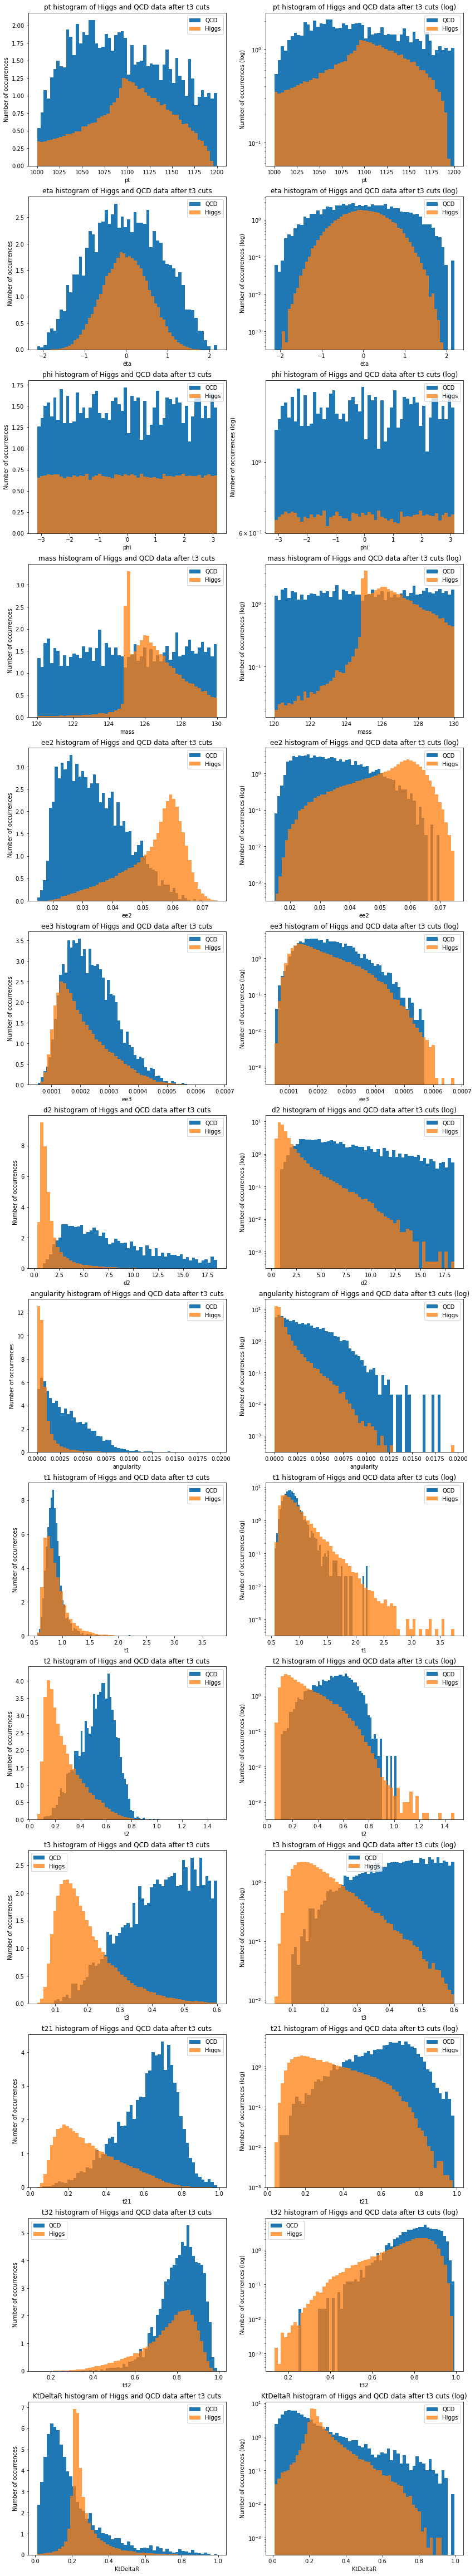

In [80]:
#plotting the data after the t_3 cuts
fig, axes = plt.subplots(14, 2, figsize=(14, 6*14))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns):
    ax[0].set_title('{} histogram of Higgs and QCD data after t3 cuts'.format(column))
    ax[0].hist(qcd_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='QCD', weights=qcd_weightT32*np.ones(len(qcd_T3cut2[column])) / len(qcd_T3cut2[column]))
    ax[0].hist(higgs_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='Higgs', weights=higgs_weightT32*np.ones(len(higgs_T3cut2[column])) / len(higgs_T3cut2[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data after t3 cuts (log)'.format(column))
    ax[1].hist(qcd_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='QCD', weights=qcd_weightT32*np.ones(len(qcd_T3cut2[column])) / len(qcd_T3cut2[column]))
    ax[1].hist(higgs_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='Higgs', weights=higgs_weightT32*np.ones(len(higgs_T3cut2[column])) / len(higgs_T3cut2[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distribution of the Higgs and QCD parameters after the $t_3$ cut that resulted in a 4.09 $\sigma$ significance.

The rest of the QCD parameters only have small amounts outside of the Higgs distributions, and won't make much of a difference on improving the significance. Now, I will be focusing on what cuts I can make that will remove the most QCD data but the least Higgs data. Any cuts that I do that wouldn't eliminate any Higgs would not make much of a difference in the significance of the Higgs data. In this case, continuing to make cuts in $t_3$ look like they will make the biggest difference.

In [85]:
#making a mask that includes t_3 values of 0.45 or below
higgscutT3_mask3 = (higgs_T3cut2['t3'] <= 0.45)
qcdcutT3_mask3 = (qcd_T3cut2['t3'] <= 0.45)

In [86]:
#applying the masks to the datasets
higgs_T3cut3 = higgs_T3cut2[higgscutT3_mask3]
qcd_T3cut3 = qcd_T3cut2[qcdcutT3_mask3]

In [87]:
#finding the new N values
higgs_weightT33 = 50*len(higgs_T3cut3)/len(higgs_table)
qcd_weightT33 = 2000*len(qcd_T3cut3)/len(qcd_table)
print(higgs_weightT33)
print(qcd_weightT33)

37.0985
43.66


In [88]:
#calculating the new significance
cutT3_sig2 = 37/np.sqrt(44)
print('The new significance of the Higgs data after the second t_3 cut: {}'.format(cutT3_sig2))

The new significance of the Higgs data after the second t_3 cut: 5.577959874688627


After selcting datapoints that had $t_3$ values of 0.45 or below, I finally got a significance above 5$\sigma$. The final amount of cuts that I did goes as follows: first I selected all events with a measured mass between 120 and 130 GeV, and then I removed any QCD events that had a $D_2$ measurement above the maximum Higgs $D_2$. I finally removed events containing a $t_3$ measurement greater than 4.5. By making these systematic cuts, which are meant to minimize the amount of background that needs to be dealt with, I am maximizing the signal-to-noise ratio (SNR) of the data. This means that the signal will count for more after the cuts than before, which is why it increases the significance of the data. The signal has a greater weight compared to the background, even though there are less signals than before, because I was able to eliminate even more background. To a certain extent, it is better to have a higher SNR that maximizing the number of signals, if that means that the number of background points increases as well.